In [24]:
%matplotlib inline
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
from sklearn.datasets import make_blobs


Text(0, 0.5, 'Feature 1')

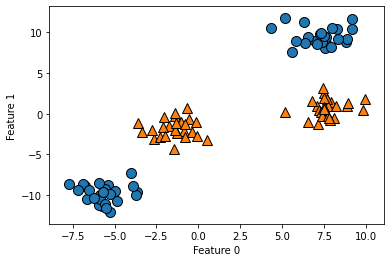

In [25]:
X, y = make_blobs(centers=4, random_state=8)
y =  y % 2

mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Text(0, 0.5, 'Feature 1')

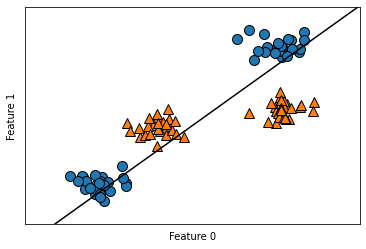

In [26]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X,y)

mglearn.plots.plot_2d_separator(linear_svm,X)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

/var/folders/v_/vqrfph2112g8639mj92n9dqw0000gn/T/ipykernel_14139/2706519359.py:9: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(figure, elev = -152, azim = -26)


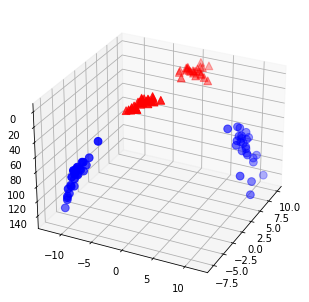

In [27]:
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()

#2番目の特徴量の2乗を追加
X_new = np.hstack((X, X[:,1:]**2))


#3Dで可視化
ax = Axes3D(figure, elev = -152, azim = -26)
# y == 0 の点をプロットしてから y == 1の点をプロット
mask = y == 0
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c = 'b',cmap=mglearn.cm2,s=60)
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c = 'r',marker='^',cmap=mglearn.cm2,s=60)


/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/var/folders/v_/vqrfph2112g8639mj92n9dqw0000gn/T/ipykernel_14139/4150780194.py:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(figure, elev=-152, azim=-26)


Text(0.5, 0, 'feature1 ** 2')

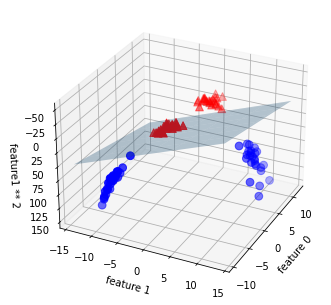

In [38]:
linear_svm_3d = LinearSVC().fit(X_new,y)
coef,intercept = linear_svm_3d.coef_.ravel(),linear_svm_3d.intercept_

#線形決定境界線を描画
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:,0].min() -2, X_new[:,0].max() +2, 50)
yy = np.linspace(X_new[:,1].min() -2, X_new[:,1].max() +2, 50)

XX,YY = np.meshgrid(xx,yy)
ZZ = (coef[0] * xx + coef[1] * YY + intercept) /  -coef[2]
ax.plot_surface(XX,YY,ZZ,rstride=8,cstride=8, alpha=0.3)
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c = 'b',cmap=mglearn.cm2,s=60)
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c = 'r',marker='^',cmap=mglearn.cm2,s=60)
ax.set_xlabel("feature 0")
ax.set_ylabel("feature 1")
ax.set_zlabel("feature1 ** 2")


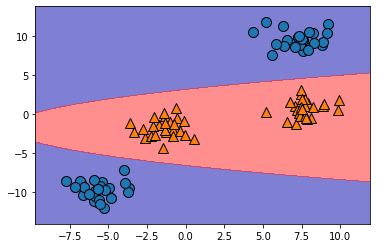

In [40]:
# ↑の決定境界線をもとの2つの特徴量の関数として表示
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(),YY.ravel(),ZZ.ravel()])
plt.contourf(XX,YY,dec.reshape(XX.shape),levels =[dec.min(),0,dec.max()],cmap = mglearn.cm2, alpha = 0.5)
mglearn.discrete_scatter(X[:,0], X[:,1],y)